<a href="https://colab.research.google.com/github/yangjinho85/KagglePUBGPrediction/blob/main/pubg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ** 데이터 로드**
PUBG Finish Placement Prediction

사용자가 몇 등으로 게임을 종료할지를 예측 하는 과제


In [3]:
path ='/content/drive/MyDrive/모델링 프로젝트/'
testv2 = pd.read_csv(path+'test_V2.csv')
trainv2 = pd.read_csv(path+'train_V2.csv')

# **EDA**

데이터 구조 파악

In [4]:
trainv2.shape

(4446966, 29)

In [5]:
trainv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
trainv2.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


In [7]:
trainv2.describe(include=["O"])

,Id,groupId,matchId,matchType
count,4446966,4446966,4446966,4446966
unique,4446966,2026745,47965,16
top,7f96b2f878858a,14d6b54cdec6bc,4b5db40aec4797,squad-fpp
freq,1,74,100,1756186


In [8]:
trainv2.sample(2)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3205935,af926927105ff7,2962cc05d6bf3a,1dcb04cafe5113,0,0,0.0,0,0,0,68,...,0,0.0,0,0.0,0,0,760.7,2,1500,0.2000
651495,ebc1032fd91324,0beb09ca0c92c9,dd5f7c0e1fbe3b,0,2,126.0,1,1,0,37,...,0,0.0,0,0.0,0,0,227.8,4,0,0.1786


전처리

In [9]:
trainv2[trainv2.isnull().any(axis=1)]
trainv2 =trainv2.drop(index=2744604) #결측치 제거

In [10]:
trainv2.matchType.value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

In [11]:
cond=trainv2.matchType.isin(['squad-fpp','duo-fpp','squad','solo-fpp','duo','solo'])

In [12]:
trainv2 = trainv2[cond]

통계지표&시각화

In [13]:
trainv2.shape

(4411698, 29)

In [14]:
trainv2.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

'Id',전부 다른 id를 가지고 있으며 중요데이터는 아니라 생각됨  drop 

'groupId',그룹 아이디가 무엇을 의미하는지 알수없음 제거해야된다 생각됨 전처리->이상데이터 drop or 보류

'matchId',게임별 아이디로 인원부족한 판은 제거해야된다 생각됨 60명 이하 데이터 drop 모델링시 삭제

'assists', 솔로모드의 데이터가 없기때문에 제거해야된다 생각됨 그룹아이디를 사용하게되면 필요데이터가 될수있다 보류

'boosts', 중요지표중 하나로 이상치 제거 해야된다고 생각됨 0.636 

'damageDealt',중요지표중 하나로 생각됨 0.450 

'DBNOs',적을 다운시킨 횟수로 중요지표중 하나로 생각됨 0.284   보류

'headshotKills',적을 만났을경우 이길확률이 높기때문에 중요지표 이상치제거 필요 보류 0.282

'heals',살아남을 확률 vs 죽을 확률 중요지표는 아니거 같다는 생각 0.430 사용

'killPlace',가장 중요한 지표라 생각된다 

'killPoints',elo시스템이라 사용vs제거 판단 안됨  drop

'kills', 중요지표라 생각됨 0.431

'killStreaks',이상치가 많아 보이며 제거해야된다 판단    보류

'longestKill',상관계수는 0.412지만 중요데이터는 아닌것 같음 보류

'matchDuration',id와 같은 중요데이터 아님 drop

'matchType',전처리를 진행하였으며 type별로 모델 학습해 보는것도 생각해봐야할것 수치형으로 바꿔서 진행

'maxPlace', drop

'numGroups',참가하는 팀이 적을수록 등수에 영향을 미친다? 추가 or 삭제  보류 

'rankPoints',elo시스템이라 사용vs제거 판단 안됨 보류

'revives',솔로모드의 데이터가 없기때문에 제거해야된다 생각됨 그룹아이디를 사용하게되면 필요데이터가 될수있다 

'rideDistance',차량이동 이상치 제거 필요 데이터의 중요도는 평균인거 같음 보류

'swimDistance', 보류

'walkDistance', 사용

'teamKills', drop
'roadKills', drop
'vehicleDestroys' drop

'weaponsAcquired', 이상치 제거하고 사용
'winPoints', 보류

'winPlacePerc'

In [15]:
trainv2.rideDistance.corr(trainv2.winPlacePerc)

0.34541530570422035

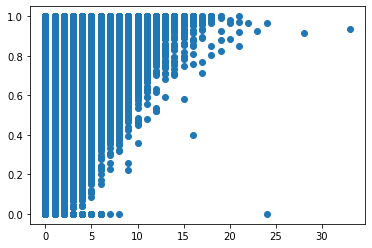

In [16]:
plt.scatter(x=trainv2.boosts,y=trainv2.winPlacePerc)
plt.show()

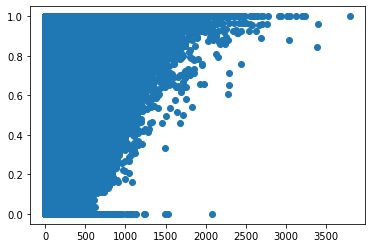

In [17]:
plt.scatter(x=trainv2.damageDealt,y=trainv2.winPlacePerc)
plt.show()

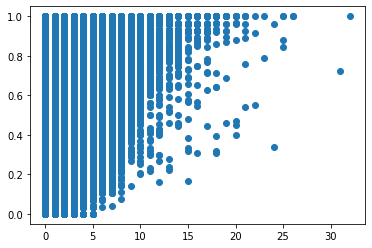

In [18]:
plt.scatter(x=trainv2.DBNOs,y=trainv2.winPlacePerc)
plt.show()

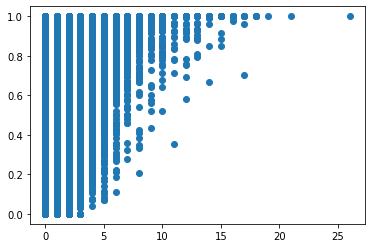

In [19]:
plt.scatter(x=trainv2.headshotKills,y=trainv2.winPlacePerc)
plt.show()

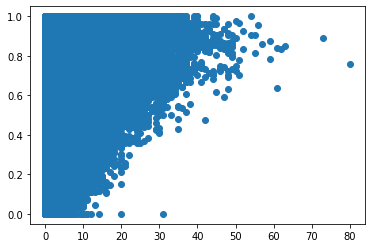

In [20]:
plt.scatter(x=trainv2.heals,y=trainv2.winPlacePerc)
plt.show()

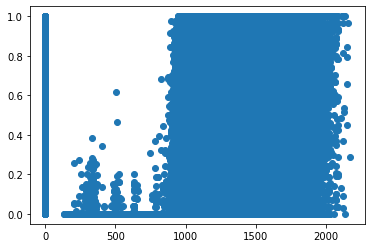

In [21]:
plt.scatter(x=trainv2.killPoints,y=trainv2.winPlacePerc)
plt.show()

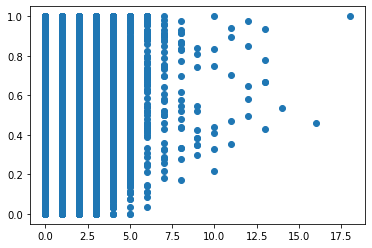

In [22]:
plt.scatter(x=trainv2.killStreaks,y=trainv2.winPlacePerc)
plt.show()

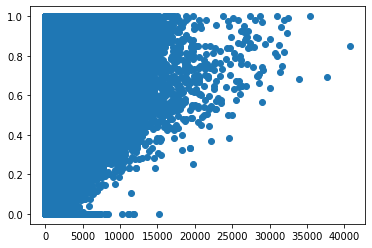

In [23]:
plt.scatter(x=trainv2.rideDistance,y=trainv2.winPlacePerc)
plt.show()

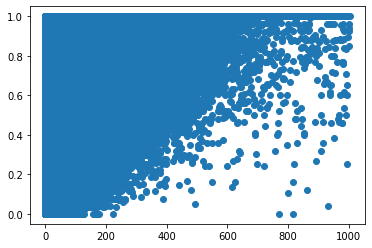

In [24]:
plt.scatter(x=trainv2.longestKill,y=trainv2.winPlacePerc)
plt.show()

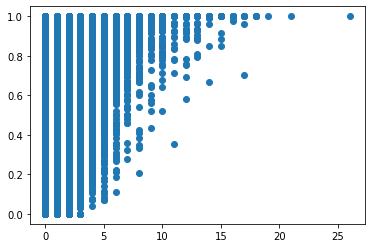

In [25]:
plt.scatter(x=trainv2.headshotKills,y=trainv2.winPlacePerc)
plt.show()

In [26]:
trainv2.matchId.value_counts()


3f5ad3b1b6f868    100
920d5e2c722cab    100
1ae5f263bbd552    100
b20e089d3322bd    100
b9bbd9f72272d8    100
                 ... 
29616490381297      8
71af975b5e9a8a      8
f491e7a7e2ff47      7
66ad63285e8952      7
8aa5066c4b6a79      5
Name: matchId, Length: 47185, dtype: int64

In [30]:
trainv2[trainv2.matchId=="b20e089d3322bd"]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
29773,233ad3e39c5c0c,2e2ee572043ad3,b20e089d3322bd,0,0,0.0,0,0,0,64,...,0,0.0,0,91.74,0,0,271.500,1,0,0.5051
54894,ab1f00e8e1f3e1,4ed3b1f52cfde0,b20e089d3322bd,0,2,179.7,0,0,0,31,...,0,0.0,0,0.00,0,0,850.000,2,0,0.6566
90076,050dbed19af99e,895d0b3569d964,b20e089d3322bd,0,0,0.0,0,0,0,89,...,0,0.0,0,0.00,0,0,74.820,0,0,0.1212
97854,44d30f97171344,3e283898daba3e,b20e089d3322bd,0,0,119.3,0,0,0,46,...,0,0.0,0,0.00,0,0,69.780,2,0,0.2525
143186,0d1672a1d92def,9771435b6a8d26,b20e089d3322bd,0,0,0.0,0,0,0,85,...,0,0.0,0,0.00,0,0,122.000,3,0,0.1919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000973,764529841c598e,1cfafb6302f75f,b20e089d3322bd,0,2,0.0,0,0,0,63,...,0,0.0,0,0.00,0,0,660.800,2,0,0.5455
4023377,2f277748e93981,9c49f34cb24d79,b20e089d3322bd,0,3,271.8,0,1,6,7,...,0,0.0,0,0.00,0,0,535.400,3,0,0.9192
4029873,eda8a60e1978fc,2dd501741b5345,b20e089d3322bd,0,0,0.0,0,0,0,81,...,0,0.0,0,0.00,0,0,43.810,0,0,0.2323
4033011,d48166663cfad1,18c27b6a2b21ca,b20e089d3322bd,0,0,100.0,0,0,0,50,...,0,0.0,0,0.00,0,0,3.737,2,0,0.0707


In [34]:
trainv2.weaponsAcquired.value_counts()

2      765105
3      764398
4      685159
1      577452
5      536909
        ...  
128         1
102         1
42          1
80          1
177         1
Name: weaponsAcquired, Length: 70, dtype: int64